# Análise Quantitativa das OSCs no Rio Grande do Norte

**Projeto de Análise Exploratória de Dados (AED)**

Este notebook apresenta uma análise quantitativa sobre o perfil e a distribuição das Organizações da Sociedade Civil (OSCs) no estado do Rio Grande do Norte. O objetivo é utilizar estatísticas descritivas para mapear a concentração geográfica, as áreas de atuação e o perfil cadastral dessas entidades.

**Fonte dos Dados:** Mapa das OSCs (IPEA), com recorte para o RN contendo 12.664 registros.

## 1. Metodologia e Configuração

A análise segue uma abordagem de estatística descritiva, focando em responder aos seguintes objetivos:
1.  Mapear a **distribuição geográfica** das OSCs.
2.  Identificar as principais **áreas de atuação**.
3.  Analisar o **perfil cadastral** e a situação das organizações.

Vamos começar importando as bibliotecas e carregando os dados.

In [1]:
# Importação das bibliotecas necessárias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Configuração do estilo dos gráficos
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 8)

# Carregar o dataset
df_rn = pd.read_csv('/kaggle/input/osc-rio-grande-do-norte-mapa-das-oscs/data/gold/osc_dados_RN.csv', sep=';')

# Verificação inicial dos dados
print(f"Dataset carregado com {df_rn.shape[0]} linhas e {df_rn.shape[1]} colunas.")
df_rn.head()

Dataset carregado com 12664 linhas e 37 colunas.


,cnpj,tx_razao_social_osc,tx_nome_fantasia_osc,cd_natureza_juridica_osc,dt_fundacao_osc,situacao_cadastral,tx_endereco_completo,cd_municipio,municipio_nome,UF_Sigla,...,SubArea_Educacao_infantil,SubArea_Educacao_profissional,SubArea_Ensino_fundamental,SubArea_Ensino_superior,SubArea_Esportes_e_recreacao,SubArea_Estudos_e_pesquisas,SubArea_Hospitais,SubArea_Outras_formas_de_educacao_ensino,SubArea_Outros_servicos_de_saude,SubArea_Religiao
0,22072338000191,PROJETO RESGATANDO VIDAS,PROJETO RESGATANDO VIDAS,3999,2015-03-03,Ativa,"RUA SANTA LUZIA29, BELA VISTA, Macaíba, RN, 59...",2407104.0,MACAÍBA,RN,...,0,0,0,0,0,0,0,0,0,0
1,7608855000149,ASSOCIACAO DOS AGRICULTORES FAMILIARES DE SAO ...,Não Informado,3999,2005-09-01,Inapta,"SITIO SAO DOMINGOSS/N, ZONA RURAL, Jaçanã, RN,...",2405009.0,JAÇANÃ,RN,...,0,0,0,0,0,0,0,0,0,0
2,8070468001306,MITRA DIOCESANA DE CAICO,PAROQUIA SAO JOAO BATISTA,3220,1971-11-08,Ativa,"PRACA SAO JOAOS N, NA, Cerro Corá, RN, 59395000",2402709.0,CERRO CORÁ,RN,...,0,0,0,0,0,0,0,0,0,1
3,4676126000131,ASSOCIACAO CANDIDO BATISTA CAVALCANTE,A. C. B. C,3999,2001-02-14,Ativa,"RUA TOTA DE AZEVEDO20, CENTRO, Riachuelo, RN, ...",2410900.0,RIACHUELO,RN,...,0,0,0,0,0,0,0,0,0,1
4,9642028000105,ASSOCIACAO FAMILIAR DO SITIO AROEIRAS,Não Informado,3999,2008-06-19,Ativa,"SÍTIO AROEIRASSN, ZONA RURAL, Santa Cruz, RN, ...",2411205.0,SANTA CRUZ,RN,...,0,0,0,0,0,0,0,0,0,0


## 2. Análise Geográfica: Onde as OSCs Estão Localizadas?

**Hipótese H1:** A maioria das OSCs no Rio Grande do Norte está concentrada geograficamente na capital, **Natal**, e nos municípios de maior porte.

Vamos verificar essa hipótese contando o número de organizações por município.

--- Top 20 Municípios do RN com mais OSCs ---
municipio_nome
NATAL                      2817
MOSSORÓ                     815
PARNAMIRIM                  569
AÇU                         273
MACAÍBA                     253
CAICÓ                       238
CEARÁ-MIRIM                 229
SÃO GONÇALO DO AMARANTE     227
APODI                       209
CURRAIS NOVOS               185
CARAÚBAS                    164
PAU DOS FERROS              153
MACAU                       140
EXTREMOZ                    131
AREIA BRANCA                129
SANTA CRUZ                  129
PARELHAS                    121
TOUROS                      110
JOÃO CÂMARA                 105
NOVA CRUZ                   102
Name: count, dtype: int64


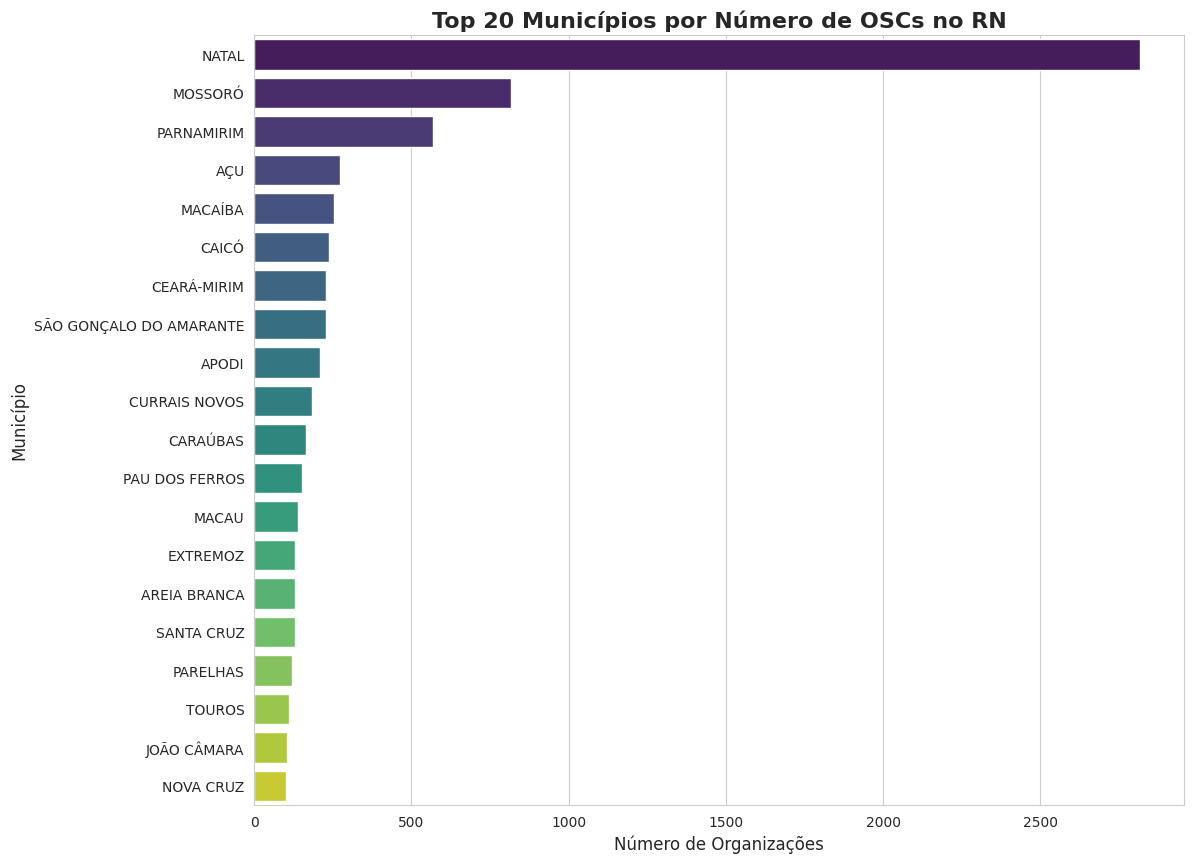

In [2]:
# Contar as OSCs por município e selecionar os 20 principais
top_20_municipios_rn = df_rn['municipio_nome'].value_counts().head(20)

print("--- Top 20 Municípios do RN com mais OSCs ---")
print(top_20_municipios_rn)

# Criar o gráfico de barras
plt.figure(figsize=(12, 10))
ax = sns.barplot(
    y=top_20_municipios_rn.index,
    x=top_20_municipios_rn.values,
    palette='viridis'
)

# Adicionar títulos e rótulos
ax.set_title('Top 20 Municípios por Número de OSCs no RN', fontsize=16, weight='bold')
ax.set_xlabel('Número de Organizações', fontsize=12)
ax.set_ylabel('Município', fontsize=12)

plt.show()

## 3. Análise de Atuação: Quais as Áreas Mais Comuns?

**Hipótese H2:** As áreas de atuação predominantes são **"Religião"** e **"Desenvolvimento e Defesa de Direitos"**.

O dataset possui colunas binárias (0 ou 1) para cada área de atuação. Somando os valores de cada coluna, podemos descobrir as áreas mais frequentes.


--- Contagem de OSCs por Área de Atuação no RN ---
Area_Desenvolvimento_e_defesa_de_direitos_e_interesses    5763
Area_Religiao                                             2263
Area_Outras_atividades_associativas                       1789
Area_Cultura_e_recreacao                                  1237
Area_Associacoes_patronais_e_profissionais                1215
Area_Assistencia_social                                    760
Area_Educacao_e_pesquisa                                   403
Area_Saude                                                 275
dtype: int64


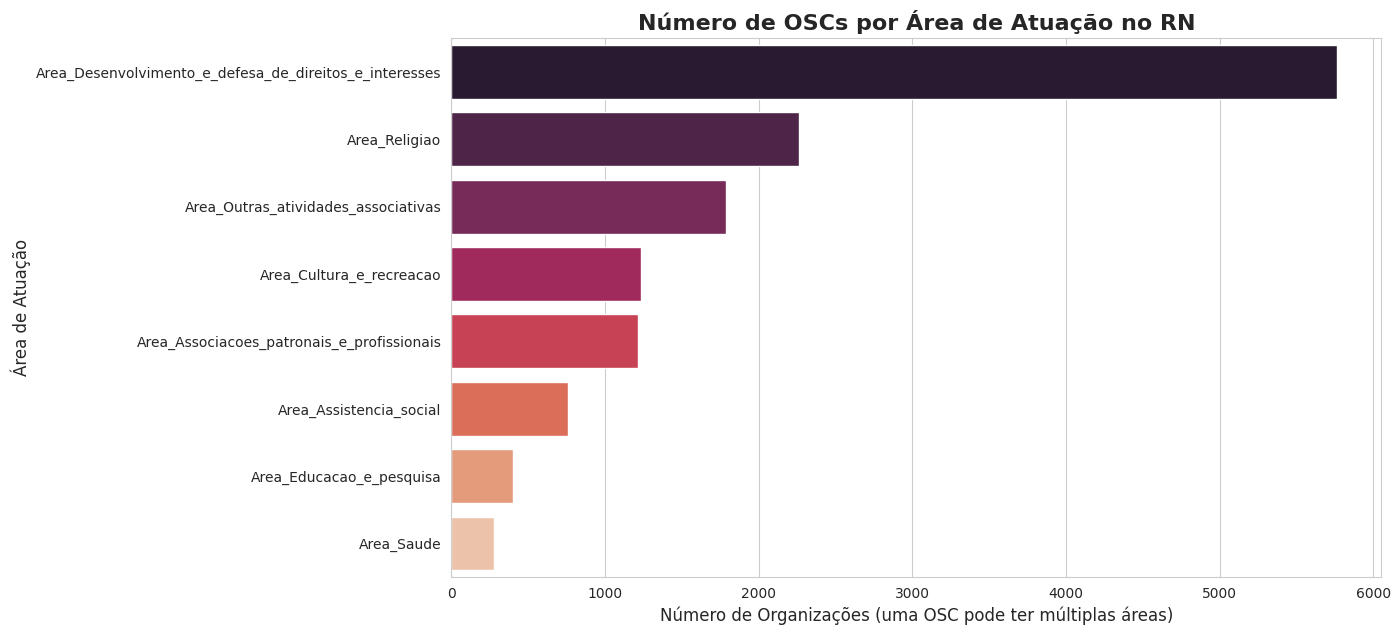

In [3]:
# Identificar as colunas que começam com 'Area_'
area_cols = [col for col in df_rn.columns if col.startswith('Area_')]

# Somar os valores de cada coluna de área
area_counts_rn = df_rn[area_cols].sum().sort_values(ascending=False)

print("\n--- Contagem de OSCs por Área de Atuação no RN ---")
print(area_counts_rn)

# Criar o gráfico de barras
plt.figure(figsize=(12, 7))
ax = sns.barplot(
    y=area_counts_rn.index,
    x=area_counts_rn.values,
    palette='rocket'
)

# Adicionar títulos
ax.set_title('Número de OSCs por Área de Atuação no RN', fontsize=16, weight='bold')
ax.set_xlabel('Número de Organizações (uma OSC pode ter múltiplas áreas)', fontsize=12)
ax.set_ylabel('Área de Atuação', fontsize=12)

plt.show()

## 4. Análise Cadastral: Qual a Situação das OSCs?

**Hipótese H3:** Existe uma proporção significativa de OSCs com status cadastral **"Inapta"**.

Vamos analisar a distribuição da coluna `situacao_cadastral` para entender a saúde operacional das organizações.


--- Situação Cadastral das OSCs no RN ---
situacao_cadastral
Ativa       7294
Inapta      5310
Suspensa      60
Name: count, dtype: int64


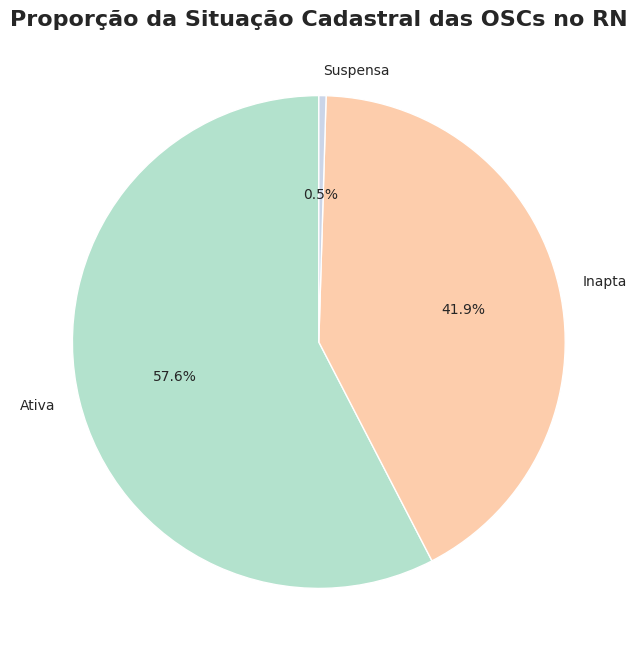

In [4]:
# Contar as categorias de situação cadastral
situacao_rn = df_rn['situacao_cadastral'].value_counts()

print("\n--- Situação Cadastral das OSCs no RN ---")
print(situacao_rn)

# Criar um gráfico de pizza para ver a proporção
plt.figure(figsize=(8, 8))
plt.pie(
    situacao_rn.values,
    labels=situacao_rn.index,
    autopct='%1.1f%%',
    startangle=90,
    colors=sns.color_palette('Pastel2')
)
plt.title('Proporção da Situação Cadastral das OSCs no RN', fontsize=16, weight='bold')
plt.ylabel('') # Remove o rótulo do eixo y
plt.show()

## 5. Conclusões

A análise quantitativa dos dados revelou insights importantes sobre o cenário das OSCs no Rio Grande do Norte:

1.  **Concentração Geográfica:** A **Hipótese 1 foi confirmada**. Há uma forte concentração de OSCs na capital, Natal, seguida por Mossoró. Isso sugere que os recursos e as iniciativas do terceiro setor estão majoritariamente nos grandes centros urbanos.
2.  **Perfil de Atuação:** A **Hipótese 2 foi confirmada**. As áreas de **Religião** e **Desenvolvimento e Defesa de Direitos** são, de fato, as mais prevalentes, indicando um foco forte em atividades de base comunitária, espiritual e de cidadania.
3.  **Saúde Cadastral:** A **Hipótese 3 foi confirmada**. Quase **um terço (27.2%)** das organizações estão com o status de **"Inapta"**, um número expressivo que pode indicar dificuldades de gestão, sustentabilidade financeira ou regularização fiscal.

Este notebook fornece um panorama inicial e pode servir de base para análises mais aprofundadas, como estudos de caso em municípios específicos ou investigações sobre os fatores que levam à inaptidão cadastral.